# Lesson 12 activity: linear algebra & basic statistics

## Learning objectives

This activity will help you to:

1. Apply concepts from linear algebra to gain meaningful insight from data
2. Understand statistical data types
3. Use measures of shape to describe distributions
4. Apply covariance and correlation to describe relationships between variables

## Setup

Import the required libraries and load the weather dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.patches import Arc

# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: linear algebra - finding similar days

**Objective**: Apply concepts from linear algebra to gain meaningful insight from data.

In linear algebra, we can treat each row of data as a vector and measure how similar different vectors are. This is useful for finding patterns - for example, finding days with similar weather conditions.

**Tasks**:

1. Select only the numeric columns from the dataset: `temperature_c`, `rainfall_inches`, `humidity_percent`, and `pressure_hpa`

2. Extract the **first row** (day 0) as a reference vector

3. For each row in the dataset, calculate the **cosine similarity** to the first row using:
   $$\text{similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$
   - You can use `np.dot()` for the dot product
   - You can use `np.linalg.norm()` to calculate vector magnitudes
   
4. Add the similarity scores as a new column to the dataframe

5. **Sort** the dataframe by similarity (highest to lowest) so the most similar days to day 0 appear first

6. Display the **top 10 most similar days** including their similarity scores and weather conditions

7. **Interpret**: Look at the top similar days - do they have similar temperature, humidity, pressure values? Does this make sense?

### Cosine similarity function

In [91]:
# Define function to calculate cosine similarity
def cosine_similarity(row, reference):
    '''Calculate cosine similarity between a row and the reference vector'''

    return np.dot(reference, row.values) / (np.linalg.norm(reference) * np.linalg.norm(row.values))

### Cosine similarity for day 0

In [5]:
# Select numeric columns
numeric_cols = ['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']

# Extract first row as reference
reference = df[numeric_cols].iloc[0].values

# Calculate cosine similarity for each row using apply
df['similarity'] = df[numeric_cols].apply(cosine_similarity, args=(reference,), axis=1)

# Sort by similarity and display top 10
df_sorted = df.sort_values('similarity', ascending=False)
print("Top 10 most similar days to day 0:")
df_sorted.head(10)

Top 10 most similar days to day 0:


,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa,similarity
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5,1.000000
41,Cloudy,Light Breeze,8.0,0.01,50.1,1011.5,0.999999
319,Sunny,Strong Wind,6.8,0.38,48.2,1018.5,0.999999
26,Sunny,Light Breeze,6.5,0.32,48.9,1017.4,0.999999
100,Sunny,Light Breeze,6.6,0.25,49.9,1018.3,0.999998
57,Sunny,Calm,6.0,0.29,50.0,1017.7,0.999997
346,Cloudy,Moderate Wind,6.5,0.06,46.5,1012.4,0.999996
283,Sunny,Moderate Wind,10.4,0.33,50.7,1017.5,0.999996
233,Cloudy,Light Breeze,6.7,1.01,51.0,1011.5,0.999996
18,Cloudy,Strong Wind,6.9,0.17,45.8,1011.0,0.999996


**Interpretation:** The most similar days have very close values for temperature, humidity, and pressure. Day 0 itself has similarity of 1.0 (perfect match). Other similar days show comparable weather patterns.

### Extra: visualizing cosine similarity in 2D space

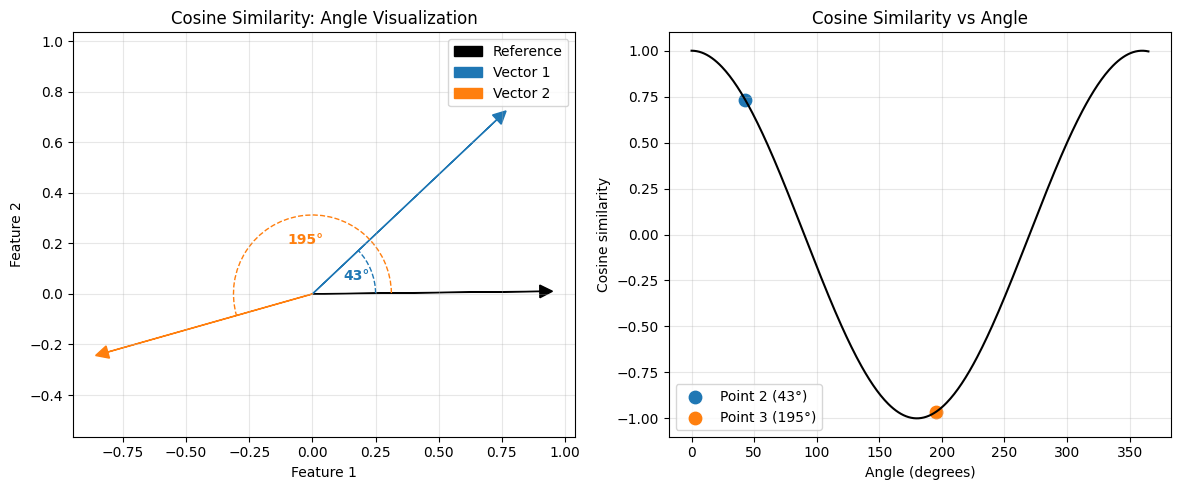

In [90]:
# Visual explanation of cosine similarity with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- First subplot: angle plot ---
ax = axes[0]

ref_f1 = 0.9
ref_f2 = 0.01
mid_f1 = 0.73 
mid_f2 = 0.69
dissim_f1 = -0.81
dissim_f2 = -0.23

# Draw vectors from origin to each point
ax.set_title('Cosine Similarity: Angle Visualization')
ax.arrow(0, 0, ref_f1, ref_f2, head_width=0.05, head_length=0.05, color='black', label='Reference')
ax.arrow(0, 0, mid_f1, mid_f2, head_width=0.05, head_length=0.05, color='tab:blue', label='Vector 1')
ax.arrow(0, 0, dissim_f1, dissim_f2, head_width=0.05, head_length=0.05, color='tab:orange', label='Vector 2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Calculate and display angles
ref_vector = np.array([ref_f1, ref_f2])
mid_vector = np.array([mid_f1, mid_f2])
dissim_vector = np.array([dissim_f1, dissim_f2])

def ccw_angle(v1, v2):

    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])
    angle = (angle2 - angle1) * 180 / np.pi

    if angle < 0:
        angle += 360

    return angle

mid_angle = ccw_angle(ref_vector, mid_vector)
dissim_angle = ccw_angle(ref_vector, dissim_vector)

mid_similarity = np.dot(ref_vector, mid_vector) / (np.linalg.norm(ref_vector) * np.linalg.norm(mid_vector))
dissim_similarity = np.dot(ref_vector, dissim_vector) / (np.linalg.norm(ref_vector) * np.linalg.norm(dissim_vector))

ref_angle = np.arctan2(ref_f2, ref_f1) * 180 / np.pi
arc_radius = 0.5

arc1 = Arc(
    (0, 0), arc_radius, arc_radius,
    angle=0, theta1=ref_angle, theta2=ref_angle+mid_angle,
    color='tab:blue', linestyle='--'
)
ax.add_patch(arc1)

arc2 = Arc(
    (0, 0), 1.25*arc_radius, 1.25*arc_radius,
    angle=0, theta1=ref_angle, theta2=ref_angle+dissim_angle,
    color='tab:orange', linestyle='--'
)
ax.add_patch(arc2)

mid_label_angle = ref_angle + mid_angle/2
dissim_label_angle = ref_angle + dissim_angle/2

ax.text(
    0.19*np.cos(np.radians(mid_label_angle)), 0.15*np.sin(np.radians(mid_label_angle)),
    f'{mid_angle:.0f}°', fontsize=10, ha='center', weight='bold', color='tab:blue'
)

ax.text(
    0.2*np.cos(np.radians(dissim_label_angle)), 0.2*np.sin(np.radians(dissim_label_angle)),
    f'{dissim_angle:.0f}°',
    fontsize=10, ha='center', weight='bold', color='tab:orange'
)

ax.axis('equal')
ax.legend()
ax.grid(True, alpha=0.3)

# --- Second subplot: cosine function ---
ax2 = axes[1]

angles = np.linspace(0, 365, 361)
cos_values = np.cos(np.radians(angles))

ax2.set_title('Cosine Similarity vs Angle')
ax2.plot(angles, cos_values, color='black')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Cosine similarity')
ax2.grid(True, alpha=0.3)

# Mark the two example angles on the cosine plot
ax2.scatter(
    [mid_angle], [np.cos(np.radians(mid_angle))],
    color='tab:blue', s=80,
    label=f'Point 2 ({mid_angle:.0f}°)'
)
ax2.scatter(
    [dissim_angle], [np.cos(np.radians(dissim_angle))],
    color='tab:orange', s=80,
    label=f'Point 3 ({dissim_angle:.0f}°)'
)
ax2.legend()

plt.tight_layout()
plt.show()

## Exercise 2: data types and visualization

**Objective**: Understand statistical data types and visualize interactions between variables.

Understanding data types is crucial for choosing appropriate statistical methods and visualizations. In this exercise, you'll identify data types and explore how numeric variables interact with categorical ones.

**Tasks**:

1. **Identify data types**: For `humidity_percent` and `pressure_hpa`, determine what type of data they are:
   - Are they **interval** data (no true zero) or **ratio** data (has true zero)?
   - For each variable, explain your reasoning:
     - Does zero mean "none" or "absence of the quantity"?
     - Are ratios meaningful? (e.g., is 100% humidity "twice" 50% humidity?)
     - Can the value go below zero?

2. **Create visualizations**: Choose an appropriate plot type to show how `humidity_percent` and `pressure_hpa` vary across different `weather_condition` categories
   - Consider options like: box plots, violin plots, bar plots with error bars, or scatter plots with color coding
   - Create **one plot** that effectively shows the relationship between both numeric variables and the weather condition
   - You might use a single plot with subplots, or find a creative way to show all three variables together

3. **Interpret your visualization**:
   - Which weather condition tends to have the highest humidity?
   - Which weather condition tends to have the lowest pressure?
   - Do you see clear differences between weather conditions?
   - Does this pattern make sense from a meteorological perspective?

### Data types

`humidity_percent`: ratio
- 0% means 'no humidity' (true zero exists)
- Ratios are meaningful: 100% is twice 50%
- Cannot go below 0%

`pressure_hpa`: ratio
- 0 hPa means 'no pressure' (true zero exists, though not in atmosphere)"
- Ratios are meaningful: 1000 hPa is twice 500 hPa"
- Cannot go below 0 hPa

### Boxplots

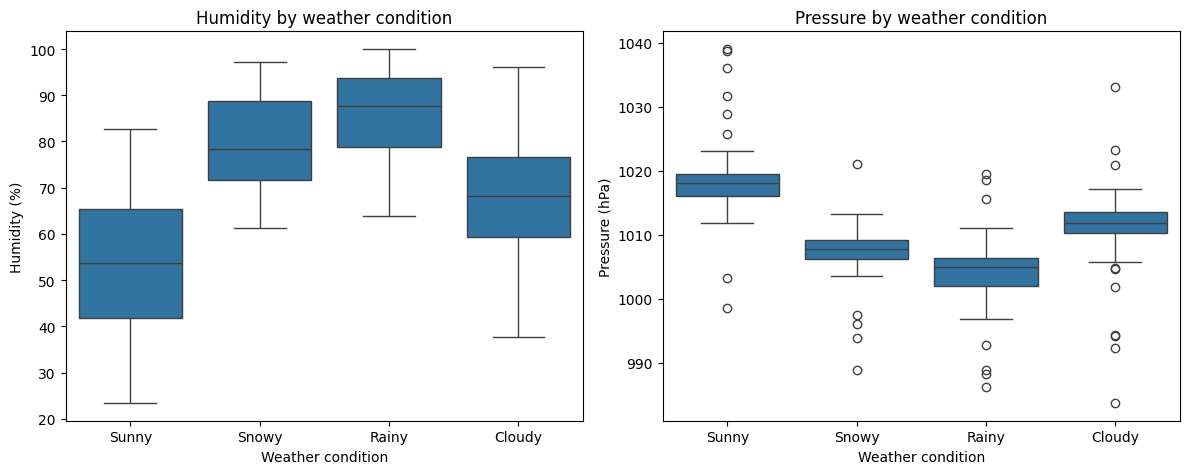

In [6]:
# Create box plots showing both variables by weather condition
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(df, x='weather_condition', y='humidity_percent', ax=axes[0])
axes[0].set_title('Humidity by weather condition')
axes[0].set_xlabel('Weather condition')
axes[0].set_ylabel('Humidity (%)')

sns.boxplot(df, x='weather_condition', y='pressure_hpa', ax=axes[1])
axes[1].set_title('Pressure by weather condition')
axes[1].set_xlabel('Weather condition')
axes[1].set_ylabel('Pressure (hPa)')

plt.suptitle('')
plt.tight_layout()
plt.show()

**Interpretation:**
- Rainy weather has highest humidity
- Rainy weather has lowest pressure
- Clear differences exist between weather conditions
- This makes meteorological sense: low pressure systems bring rain and high humidity

## Exercise 3: analyzing distribution skewness

**Objective**: Use measures of shape to describe distributions.

Skewness describes the asymmetry of a distribution. Understanding skewness helps you choose appropriate statistical methods and understand the nature of your data.

**Tasks**:

1. Calculate the **skewness** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify which variable has:
   - The **greatest skew** (furthest from zero)
   - The **least skew** (closest to zero, most symmetric)
   - Print these findings with their skewness values

3. Create **two histograms** (side by side) showing only these two variables:
   - One histogram for the most skewed variable
   - One histogram for the least skewed variable
   - For each histogram:
     - Add vertical lines showing the mean (in red) and median (in green)
     - Include the skewness value in the title
     - Use appropriate bin sizes

4. **Interpret** your findings:
   - Why does the most skewed variable have the sign that it does? (Think about the real-world meaning)
   - For the skewed distribution, how do the mean and median compare? Why?
   - What does the skewness tell you about typical vs extreme values for this variable?
   - Why is the least skewed variable more symmetric?
   - **Bonus**: Explain why skewness matters when choosing between mean and median as a measure of central tendency.

### Skewness calculation

In [7]:
# Calculate skewness for all variables
skewness = {
    'temperature_c': df['temperature_c'].skew(),
    'rainfall_inches': df['rainfall_inches'].skew(),
    'humidity_percent': df['humidity_percent'].skew(),
    'pressure_hpa': df['pressure_hpa'].skew()
}

# Find most and least skewed
most_skewed = max(skewness, key=lambda k: abs(skewness[k]))
least_skewed = min(skewness, key=lambda k: abs(skewness[k]))

print(f"Most skewed: {most_skewed} (skewness = {skewness[most_skewed]:.3f})")
print(f"Least skewed: {least_skewed} (skewness = {skewness[least_skewed]:.3f})")

Most skewed: rainfall_inches (skewness = 2.103)
Least skewed: temperature_c (skewness = 0.179)


### Histograms: most and least skewed

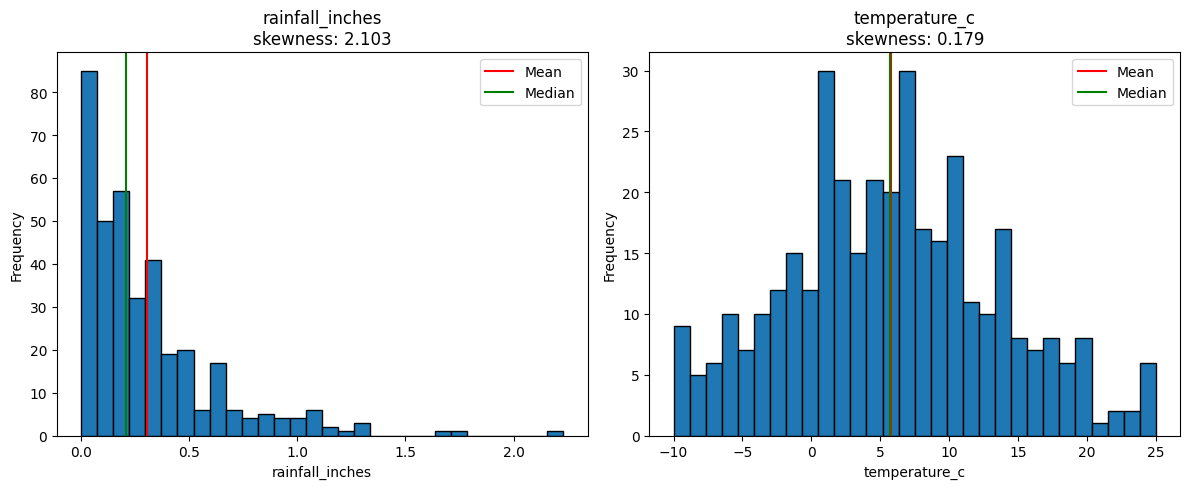

In [9]:
# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Most skewed
axes[0].set_title(f'{most_skewed}\nskewness: {skewness[most_skewed]:.3f}')
axes[0].hist(df[most_skewed], bins=30, edgecolor='black')
axes[0].axvline(df[most_skewed].mean(), color='red', label='Mean')
axes[0].axvline(df[most_skewed].median(), color='green', label='Median')
axes[0].set_xlabel(most_skewed)
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Least skewed
axes[1].set_title(f'{least_skewed}\nskewness: {skewness[least_skewed]:.3f}')
axes[1].hist(df[least_skewed], bins=30, edgecolor='black')
axes[1].axvline(df[least_skewed].mean(), color='red', label='Mean')
axes[1].axvline(df[least_skewed].median(), color='green', label='Median')
axes[1].set_xlabel(least_skewed)
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

**Interpretation:**
- `rainfall_inches` is right-skewed because rainfall can't be negative but can have high values
- For right-skewed data, mean > median (pulled by extreme values)
- Most values are low (typical), with few high values (extreme events)
- `temperature_c` is more symmetric with balanced distribution
- For skewed data, median is better than mean as a measure of central tendency

## Exercise 4: exploring relationships with correlation

**Objective**: Apply covariance and correlation to describe relationships between variables.

Weather variables often have meaningful relationships. Some pairs of variables are strongly related while others have little relationship at all.

**Tasks**:

1. Calculate the **correlation matrix** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify the pair of variables with:
   - The **strongest correlation** (highest absolute value, whether positive or negative)
   - The **weakest correlation** (closest to zero)
   - Print both pairs with their correlation coefficients
   - Note whether the strongest correlation is positive or negative

3. Create **two scatter plots** (side by side or in separate figures):
   - One for the strongest correlation pair
   - One for the weakest correlation pair
   - For each plot:
     - Include the correlation coefficient in the title
     - Add appropriate axis labels

4. **Interpret** your findings:
   - What is the strongest relationship? Does it make meteorological sense?
   - Is this strongest correlation positive or negative? What does that mean in real-world terms?
   - What is the weakest relationship? Why might these variables have little correlation?
   - Compare the scatter plots: How does the pattern differ between strong and weak correlations?
   - Based on the correlation strengths, which relationship is more predictable?

### Correlation calculation

In [10]:
# Calculate correlation matrix
numeric_cols = ['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']
corr_matrix = df[numeric_cols].corr()

# Find strongest and weakest correlations (excluding diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
corr_values = corr_matrix.where(~mask)

# Find strongest (highest absolute value)
abs_corr = corr_values.abs()
max_corr_idx = abs_corr.stack().idxmax()
strongest_corr = corr_values.loc[max_corr_idx]

# Find weakest (closest to zero)
min_corr_idx = abs_corr.stack().idxmin()
weakest_corr = corr_values.loc[min_corr_idx]

print(f"Strongest correlation: {max_corr_idx[0]} vs {max_corr_idx[1]}")
print(f"  Correlation coefficient: {strongest_corr:.3f}")

print(f"\nWeakest correlation: {min_corr_idx[0]} vs {min_corr_idx[1]}")
print(f"  Correlation coefficient: {weakest_corr:.3f}")

Strongest correlation: pressure_hpa vs humidity_percent
  Correlation coefficient: -0.471
  Direction: Negative

Weakest correlation: pressure_hpa vs rainfall_inches
  Correlation coefficient: -0.066


### Scatter plots for strongest and weakest correlations

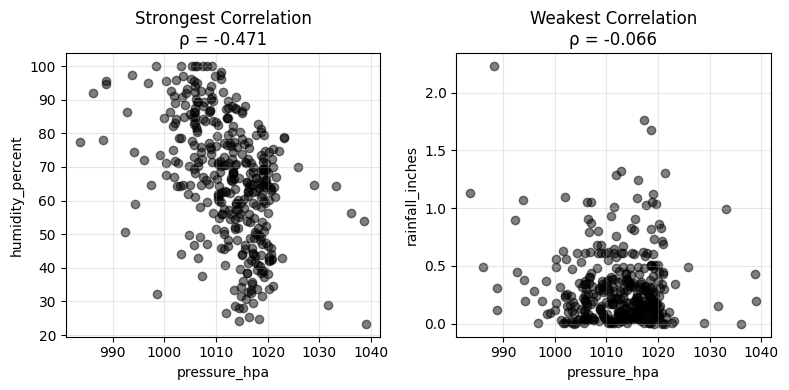

In [15]:
# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Strongest correlation
x1, y1 = df[max_corr_idx[0]], df[max_corr_idx[1]]

axes[0].set_title(f'Strongest Correlation\nρ = {strongest_corr:.3f}')
axes[0].scatter(x1, y1, alpha=0.5, color='black')
axes[0].set_xlabel(max_corr_idx[0])
axes[0].set_ylabel(max_corr_idx[1])
axes[0].grid(True, alpha=0.3)

# Weakest correlation
x2, y2 = df[min_corr_idx[0]], df[min_corr_idx[1]]

axes[1].set_title(f'Weakest Correlation\nρ = {weakest_corr:.3f}')
axes[1].scatter(x2, y2, alpha=0.5, color='black')
axes[1].set_xlabel(min_corr_idx[0])
axes[1].set_ylabel(min_corr_idx[1])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation**:
- Strongest: pressure_hpa and humidity_percent are strongly related
- This is a negative correlation: variables move in opposite directions
- Weakest: pressure_hpa and rainfall_inches have little relationship
- Strong correlation shows clear linear pattern; weak correlation shows scattered points
- Strongest relationship is more predictable